# Import

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
import statsmodels.formula.api as smf 
import re


# Load Data

In [8]:
file_dir = "/Users/huayinluo/Desktop/code/natconv"
csv1 = pd.read_csv(f"{file_dir}/combinedSurvey.csv")
csv1 = csv1.rename(columns={'convo_id': 'conversation'}) # rename column
csv2 = pd.read_csv(f"{file_dir}/backchannel.csv")
df = pd.merge(csv1, csv2, on='conversation') # merge based on conversation id
df = df.drop(columns=['Unnamed: 0_x', 'Unnamed: 0_y']) # drop columns


In [9]:
df["backchannel_count"] = df["backchannel_given"] + df["backchannel_recieved"]

In [10]:
df.to_csv(f"{file_dir}/natconv.csv")

In [11]:
df.head()

,user_id,partner_id,conversation,date,survey_duration_in_seconds,time_zone,pre_affect,pre_arousal,technical_quality,conv_length,...,your_agreeable,your_conscientious,your_neurotic,your_open,who_i_talked_to_most_past24,most_common_format_past24,speaker,backchannel_given,backchannel_recieved,backchannel_count
0,5a73899f9cdd1800017786f0,5fa072f4f4aa580b63834357,0020a0c5-1658-4747-99c1-2839e736b481,2020-11-10,4115,6.0,5.0,4.0,1.0,45.0,...,4.000000,4.666667,3.000000,4.666667,NaN,NaN,5a73899f9cdd1800017786f0,269,83,352
1,5a73899f9cdd1800017786f0,5fa072f4f4aa580b63834357,0020a0c5-1658-4747-99c1-2839e736b481,2020-11-10,4115,6.0,5.0,4.0,1.0,45.0,...,4.000000,4.666667,3.000000,4.666667,NaN,NaN,5fa072f4f4aa580b63834357,83,269,352
2,5fa072f4f4aa580b63834357,5a73899f9cdd1800017786f0,0020a0c5-1658-4747-99c1-2839e736b481,2020-11-10,3949,6.0,7.0,6.0,1.0,43.0,...,4.000000,4.333333,2.666667,3.666667,NaN,NaN,5a73899f9cdd1800017786f0,269,83,352
3,5fa072f4f4aa580b63834357,5a73899f9cdd1800017786f0,0020a0c5-1658-4747-99c1-2839e736b481,2020-11-10,3949,6.0,7.0,6.0,1.0,43.0,...,4.000000,4.333333,2.666667,3.666667,NaN,NaN,5fa072f4f4aa580b63834357,83,269,352
4,5f482b0da1cde52de45f174c,5f57120cba207c18f058a62b,002d68da-7738-4177-89d9-d72ae803e0e4,2020-11-15,3293,8.0,7.0,6.0,1.0,34.0,...,3.666667,2.666667,4.000000,4.000000,NaN,NaN,5f482b0da1cde52de45f174c,76,96,172


In [12]:
df.shape

(6624, 226)

In [13]:
df = df.drop_duplicates(subset=['user_id', 'conversation'], keep='first')

In [14]:
df.shape

(3312, 226)

In [15]:
df.describe()

,survey_duration_in_seconds,time_zone,pre_affect,pre_arousal,technical_quality,conv_length,affect,arousal,overall_affect,overall_arousal,...,my_neurotic,my_open,your_extraversion,your_agreeable,your_conscientious,your_neurotic,your_open,backchannel_given,backchannel_recieved,backchannel_count
count,3312.000000,3265.000000,3312.000000,3312.000000,3306.000000,3306.000000,3257.000000,3257.000000,3257.000000,3257.000000,...,3256.000000,3256.000000,3256.000000,3256.000000,3256.000000,3256.000000,3256.000000,3312.000000,3312.000000,3312.000000
mean,3876.525664,6.006126,6.101449,5.322162,1.163944,31.044011,7.299662,6.409886,7.323611,6.506601,...,2.889230,4.000614,3.245086,4.103604,3.788595,2.426085,3.743653,130.885870,142.352053,273.237923
std,4189.391474,1.231216,1.504038,1.765919,0.387061,49.829181,1.318868,1.705048,1.296721,1.677290,...,1.125121,0.799086,0.902932,0.671855,0.753472,0.755656,0.739455,74.727805,81.087235,100.780872
min,10.000000,5.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,4.000000
25%,2831.000000,5.000000,5.000000,4.000000,1.000000,26.000000,7.000000,5.000000,7.000000,5.000000,...,2.000000,3.333333,2.666667,3.666667,3.333333,2.000000,3.333333,78.750000,86.000000,205.750000
50%,3317.000000,6.000000,6.000000,5.000000,1.000000,28.000000,7.000000,7.000000,7.000000,7.000000,...,3.000000,4.000000,3.333333,4.333333,3.666667,2.333333,3.666667,115.000000,125.000000,259.000000
75%,4097.000000,7.000000,7.000000,7.000000,1.000000,31.000000,8.000000,8.000000,8.000000,8.000000,...,3.666667,4.666667,4.000000,4.666667,4.333333,3.000000,4.333333,164.250000,178.250000,322.000000
max,191242.000000,10.000000,9.000000,9.000000,4.000000,2854.000000,9.000000,9.000000,9.000000,9.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,602.000000,731.000000,951.000000


# Preprocessing


## Data Dictionary

In [16]:
datadict = pd.read_csv("datadict.csv")
datadict

,column,text,sub_questions,type,selector,sub_selector,choices,notes
0,user_id,The ID of the respondent.,NaN,NaN,NaN,NaN,NaN,NaN
1,partner_id,The ID of the respondent's partner.,NaN,NaN,NaN,NaN,NaN,NaN
2,convo_id,The ID of the conversation.,NaN,NaN,NaN,NaN,NaN,NaN
3,date,The date of the survey.,NaN,NaN,NaN,NaN,NaN,NaN
4,survey_duration_in_seconds,Amount of time taken to complete the survey.,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
224,your_conscientious,"Now, please tell us where you think your conve...","tends to be quiet, is compassionate, has a sof...",matrix table,likert,single answer question,"1 - Disagree strongly, 2 - Disagree a little, ...",NaN
225,your_neurotic,"Now, please tell us where you think your conve...","tends to be quiet, is compassionate, has a sof...",matrix table,likert,single answer question,"1 - Disagree strongly, 2 - Disagree a little, ...",NaN
226,your_open,"Now, please tell us where you think your conve...","tends to be quiet, is compassionate, has a sof...",matrix table,likert,single answer question,"1 - Disagree strongly, 2 - Disagree a little, ...",NaN
227,who_i_talked_to_most_past24,Who were your conversations with? In other wor...,none,constant sum,number entry,text box,"Family, Romantic Partner, Friends, Work Collea...",NaN


In [17]:
datadict

,column,text,sub_questions,type,selector,sub_selector,choices,notes
0,user_id,The ID of the respondent.,NaN,NaN,NaN,NaN,NaN,NaN
1,partner_id,The ID of the respondent's partner.,NaN,NaN,NaN,NaN,NaN,NaN
2,convo_id,The ID of the conversation.,NaN,NaN,NaN,NaN,NaN,NaN
3,date,The date of the survey.,NaN,NaN,NaN,NaN,NaN,NaN
4,survey_duration_in_seconds,Amount of time taken to complete the survey.,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
224,your_conscientious,"Now, please tell us where you think your conve...","tends to be quiet, is compassionate, has a sof...",matrix table,likert,single answer question,"1 - Disagree strongly, 2 - Disagree a little, ...",NaN
225,your_neurotic,"Now, please tell us where you think your conve...","tends to be quiet, is compassionate, has a sof...",matrix table,likert,single answer question,"1 - Disagree strongly, 2 - Disagree a little, ...",NaN
226,your_open,"Now, please tell us where you think your conve...","tends to be quiet, is compassionate, has a sof...",matrix table,likert,single answer question,"1 - Disagree strongly, 2 - Disagree a little, ...",NaN
227,who_i_talked_to_most_past24,Who were your conversations with? In other wor...,none,constant sum,number entry,text box,"Family, Romantic Partner, Friends, Work Collea...",NaN


In [18]:
def get_columns_by_type(df, type):
    cols = df.groupby(type).count().sort_values("column", ascending=False)["column"].index # get questions with most subquestions
    cols_dct = {}
    for type_option in cols:
        cols_dct[type_option] = df[df[type] == type_option]["column"].values
    return cols_dct

In [19]:
get_columns_by_type(datadict, "type")

{'matrix table': array(['i_felt_close_to_my_partner', 'i_would_like_to_become_friends',
        'i_paid_attention_to_my_partner',
        'my_partner_paid_attention_to_me',
        'my_partner_was_clear_and_coherent', 'you_are_intelligent',
        'you_are_quickwitted', 'you_are_competent', 'you_are_kind',
        'you_are_friendly', 'you_are_warm', 'you_think_i_am_intelligent',
        'you_think_i_am_quickwitted', 'you_think_i_am_competent',
        'you_think_i_am_kind', 'you_think_i_am_friendly',
        'you_think_i_am_warm', 'you_are_humble', 'you_are_giving',
        'you_are_fair', 'you_are_trustworthy', 'you_are_agreeable',
        'you_are_playful', 'i_am_intelligent', 'i_am_quickwitted',
        'i_am_competent', 'i_am_kind', 'i_am_friendly', 'i_am_warm',
        'i_am_humble', 'i_am_giving', 'i_am_fair', 'i_am_trustworthy',
        'i_am_agreeable', 'i_am_playful', 'our_thoughts_synced_up_sr1',
        'developed_joint_perspective_sr2', 'shared_thoughts_feels_sr3',
       

In [20]:
df[(df.columns[df.isna().any()].tolist())].isnull().sum()

time_zone                        47
technical_quality                 6
conv_length                       6
affect                           55
arousal                          55
                               ... 
your_conscientious               56
your_neurotic                    56
your_open                        56
who_i_talked_to_most_past24    2784
most_common_format_past24      2784
Length: 208, dtype: int64

In [21]:
print(df["end_memory_text"].isna().sum())
print(df["middle_memory_text"].isna().sum())
print(df["begin_memory_text"].isna().sum())
print(df["critical_positive"].isna().sum())
print(df["critical_negative"].isna().sum())
print(df["rest_of_day_open"].isna().sum())
print(df["conv_length"].isna().sum())


2490
2490
2490
55
55
55
6


In [22]:
# Interesting survey text columns
['begin_memory_text', 'middle_memory_text',
        'end_memory_text', 'rest_of_day_open']

['begin_memory_text',
 'middle_memory_text',
 'end_memory_text',
 'rest_of_day_open']

In [23]:
df["end_affect"].isnull().sum()

55

## Correlations (Backchannel)

In [24]:
corr_df = pd.read_csv("corr.csv")
corr_df = corr_df.drop(columns=['Unnamed: 0'])
corr_df

,column,corr,column_description
0,your_mind_wander,-0.130299,"102 During your conversation, how much do y..."
1,interested_in_exchanging_contact_info,-0.129407,48 If you had the opportunity to exchange c...
2,my_sad_pre_covid,-0.122337,"195 Prior to the Covid-19 outbreak, to what..."
3,my_mind_wander,-0.120472,"101 During your conversation, how much did ..."
4,you_are_good_listener,0.101569,96 My partner was a good listener.\nName: t...
...,...,...,...
56,how_long_other,0.229871,119 How much longer do you think your partn...
57,am_i_sheltering_in_place_now,0.232449,202 Are you currently staying at home most ...
58,backchannel_given,0.644520,"Series([], Name: text, dtype: object)"
59,backchannel_recieved,0.644520,"Series([], Name: text, dtype: object)"


Survey questions and related columns

In [25]:
questions = datadict.groupby("text").count().sort_values("column", ascending=False)["column"].index # get questions with most subquestions
question_dct = {}
for question in questions:
    question_dct[question] = datadict[datadict["text"] == question]["column"].values    

In [26]:
for key, value in question_dct.items():
    print(key)
    print(value)
    print("\n")

Now, please tell us where you think your conversation partner falls on these items. My conversation partner is...
['your_bfi_1' 'your_bfi_2' 'your_bfi_3' 'your_bfi_4' 'your_bfi_5'
 'your_bfi_6' 'your_bfi_7' 'your_bfi_8' 'your_bfi_9' 'your_bfi_10'
 'your_bfi_11' 'your_bfi_12' 'your_bfi_13' 'your_bfi_14' 'your_bfi_15'
 'your_extraversion' 'your_agreeable' 'your_conscientious' 'your_neurotic'
 'your_open']


I am someone who...
['my_bfi_1' 'my_bfi_2' 'my_bfi_3' 'my_bfi_4' 'my_bfi_5' 'my_bfi_6'
 'my_bfi_7' 'my_bfi_8' 'my_bfi_9' 'my_bfi_10' 'my_bfi_11' 'my_bfi_12'
 'my_bfi_13' 'my_bfi_14' 'my_bfi_15' 'my_extraversion' 'my_agreeable'
 'my_conscientious' 'my_neurotic' 'my_open']


How would you rate yourself on each of the following traits?
['i_am_intelligent' 'i_am_quickwitted' 'i_am_competent' 'i_am_kind'
 'i_am_friendly' 'i_am_warm' 'i_am_humble' 'i_am_giving' 'i_am_fair'
 'i_am_trustworthy' 'i_am_agreeable' 'i_am_playful']


Please rate your agreement with the following statements about y

In [27]:
from itertools import groupby
likert = datadict[datadict["selector"]=="likert"]["column"]
likert = [list(g) for k, g in groupby(likert, key=lambda x: x[:2])]
for lst in likert:
    print(lst)


['i_felt_close_to_my_partner', 'i_would_like_to_become_friends', 'i_paid_attention_to_my_partner']
['my_partner_paid_attention_to_me', 'my_partner_was_clear_and_coherent']
['you_are_intelligent', 'you_are_quickwitted', 'you_are_competent', 'you_are_kind', 'you_are_friendly', 'you_are_warm', 'you_think_i_am_intelligent', 'you_think_i_am_quickwitted', 'you_think_i_am_competent', 'you_think_i_am_kind', 'you_think_i_am_friendly', 'you_think_i_am_warm', 'you_are_humble', 'you_are_giving', 'you_are_fair', 'you_are_trustworthy', 'you_are_agreeable', 'you_are_playful']
['i_am_intelligent', 'i_am_quickwitted', 'i_am_competent', 'i_am_kind', 'i_am_friendly', 'i_am_warm', 'i_am_humble', 'i_am_giving', 'i_am_fair', 'i_am_trustworthy', 'i_am_agreeable', 'i_am_playful']
['our_thoughts_synced_up_sr1']
['developed_joint_perspective_sr2']
['shared_thoughts_feels_sr3']
['discussed_real_things_sr4']
['thoughts_became_more_alike_sr5']
['anticipated_each_other_sr6']
['became_certain_of_perception_sr7']
['s

In [28]:
datadict

,column,text,sub_questions,type,selector,sub_selector,choices,notes
0,user_id,The ID of the respondent.,NaN,NaN,NaN,NaN,NaN,NaN
1,partner_id,The ID of the respondent's partner.,NaN,NaN,NaN,NaN,NaN,NaN
2,convo_id,The ID of the conversation.,NaN,NaN,NaN,NaN,NaN,NaN
3,date,The date of the survey.,NaN,NaN,NaN,NaN,NaN,NaN
4,survey_duration_in_seconds,Amount of time taken to complete the survey.,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
224,your_conscientious,"Now, please tell us where you think your conve...","tends to be quiet, is compassionate, has a sof...",matrix table,likert,single answer question,"1 - Disagree strongly, 2 - Disagree a little, ...",NaN
225,your_neurotic,"Now, please tell us where you think your conve...","tends to be quiet, is compassionate, has a sof...",matrix table,likert,single answer question,"1 - Disagree strongly, 2 - Disagree a little, ...",NaN
226,your_open,"Now, please tell us where you think your conve...","tends to be quiet, is compassionate, has a sof...",matrix table,likert,single answer question,"1 - Disagree strongly, 2 - Disagree a little, ...",NaN
227,who_i_talked_to_most_past24,Who were your conversations with? In other wor...,none,constant sum,number entry,text box,"Family, Romantic Partner, Friends, Work Collea...",NaN


In [29]:
datadict[datadict["type"].notna()].groupby("type").count()

,column,text,sub_questions,selector,sub_selector,choices,notes
type,,,,,,,
constant sum,14,14,14,14,14,14,0
descriptive block,1,1,1,1,1,1,0
matrix table,96,96,96,96,96,96,0
multiple choice,91,91,91,91,91,91,1
slider,5,5,5,5,5,4,0
text entry,16,16,16,16,16,16,0


In [30]:
# 
datadict[datadict["type"].notna()].groupby("selector").count()

,column,text,sub_questions,type,sub_selector,choices,notes
selector,,,,,,,
horizontal slider,5,5,5,5,5,4,0
likert,96,96,96,96,96,96,0
number entry,14,14,14,14,14,14,0
single answer horizontal,61,61,61,61,61,61,1
single answer vertical,30,30,30,30,30,30,0
slider,9,9,9,9,9,9,0
text box,8,8,8,8,8,8,0


In [31]:
datadict[datadict["choices"].notna()].groupby("choices").count()

,column,text,sub_questions,type,selector,sub_selector,notes
choices,,,,,,,
&nbsp;,3,3,3,3,3,3,0
"0 - Does not describe me at all, 1 - Does not describe me, 2 - Describes me somewhat, 3 - Describes me well, 4 - Describes me very well",2,2,2,2,2,2,0
"0, 1, 2, 3, 4, 5, 6, 7",1,1,1,1,1,1,1
"1 - Disagree strongly, 2 - Disagree a little, 3 - Neutral; no opinion, 4 - Agree a little, 5 - Agree strongly",40,40,40,40,40,40,0
"1 - Extremely bad, 2, 3, 4, 5, 6, 7, 8, 9 - Extremely good",4,4,4,4,4,4,0
"1 - Extremely low, 2, 3, 4, 5, 6, 7, 8, 9 - Extremely high",9,9,9,9,9,9,0
"1 - Extremely negative, 2, 3, 4, 5, 6, 7, 8, 9 - Extremely positive",10,10,10,10,10,10,0
"1 - I asked many more questions than my partner did, 2, 3, 4, 5 - We asked the exact same amount of questions, 6, 7, 8, 9 - My partner asked more questions than I did",1,1,1,1,1,1,0
"1 - I did this much more than my partner did, 2, 3, 4, 5 - We did this the exact same amount, 6, 7, 8, 9 - My partner did this much more than I did",1,1,1,1,1,1,0


In [32]:
import re
datadict_int= datadict[datadict["choices"].notna()].copy()
datadict_int["int_choices"] = datadict_int["choices"].apply(lambda x: re.findall(r'\d+', x))
datadict_int["int_choices_len"] = datadict_int["int_choices"].apply(lambda x: len(x))
datadict_int["int_choices"] = [','.join(map(str, l)) for l in datadict_int['int_choices']]
datadict_int.groupby("int_choices").count()

,column,text,sub_questions,type,selector,sub_selector,choices,notes,int_choices_len
int_choices,,,,,,,,,
,73,73,73,73,73,73,73,0,73
"0,1,2,3,4",2,2,2,2,2,2,2,0,2
"0,1,2,3,4,5,6,7",1,1,1,1,1,1,1,1,1
1,2,2,2,2,2,2,2,0,2
"1,1,2,3,4",1,1,1,1,1,1,1,0,1
"1,2,3,4,5",40,40,40,40,40,40,40,0,40
"1,2,3,4,5,6,7",20,20,20,20,20,20,20,0,20
"1,2,3,4,5,6,7,8,9",76,76,76,76,76,76,76,0,76
"10,00,9,00,8,00,7,00,6,00,5,00",1,1,1,1,1,1,1,0,1


In [33]:
datadict_int.groupby("int_choices_len").count()

,column,text,sub_questions,type,selector,sub_selector,choices,notes,int_choices
int_choices_len,,,,,,,,,
0,73,73,73,73,73,73,73,0,73
1,3,3,3,3,3,3,3,0,3
5,43,43,43,43,43,43,43,0,43
6,2,2,2,2,2,2,2,0,2
7,20,20,20,20,20,20,20,0,20
8,1,1,1,1,1,1,1,1,1
9,76,76,76,76,76,76,76,0,76
10,3,3,3,3,3,3,3,0,3
12,1,1,1,1,1,1,1,0,1


In [34]:
len(df.columns) # 226 columns in total

226

## Distributions of variables

## Finding outcome variables

In [35]:
affect_arousal_outcomes = list(filter(re.compile("^.*(arousal|affect).*$").match, df.columns))
memory_outcomes = list(filter(re.compile("^.*memory.*$").match, df.columns))

you_are_outcomes = list(filter(re.compile("you_are").match, df.columns))
you_think_outcomes = list(filter(re.compile("you_think").match, df.columns))
you_outcomes = [col for col in df.columns if col.startswith("you_") and col not in you_are_outcomes and col not in you_think_outcomes]

i_am_outcomes = list(filter(re.compile("^i_am").match, df.columns))
i_think_outcomes = list(filter(re.compile("^i_think").match, df.columns))
i_outcomes = [col for col in df.columns if col.startswith("i_") and col not in i_am_outcomes and col not in i_think_outcomes]
bfi_outcomes = list(filter(re.compile("^.*bfi.*$").match, df.columns))

ranking_outcomes = ["conversationalist", "my_friends_like"]

outcomes = bfi_outcomes+ affect_arousal_outcomes + you_are_outcomes + you_think_outcomes + i_am_outcomes + i_think_outcomes + memory_outcomes + i_outcomes + you_outcomes
other_var = [col for col in df.columns if col not in outcomes]

In [36]:
print(len(affect_arousal_outcomes), affect_arousal_outcomes)
print(len(memory_outcomes), memory_outcomes)
print(len(bfi_outcomes), bfi_outcomes)
print("\n")
print(len(you_are_outcomes), you_are_outcomes)
print(len(you_think_outcomes), you_think_outcomes)
print(len(you_outcomes), you_outcomes)
print("\n")
print(len(i_am_outcomes), i_am_outcomes)
print(len(i_think_outcomes), i_think_outcomes)
print(len(i_outcomes), i_outcomes)
print("\n")
print(len(other_var), other_var)
print(f"{len(outcomes)} outcomes in total")

16 ['pre_affect', 'pre_arousal', 'affect', 'arousal', 'overall_affect', 'overall_arousal', 'begin_affect', 'begin_arousal', 'middle_affect', 'middle_arousal', 'end_affect', 'end_arousal', 'worst_affect', 'worst_arousal', 'best_affect', 'best_arousal']
7 ['overall_memory_rating', 'begin_memory_rating', 'begin_memory_text', 'middle_memory_rating', 'middle_memory_text', 'end_memory_rating', 'end_memory_text']
30 ['my_bfi_1', 'my_bfi_2', 'my_bfi_3', 'my_bfi_4', 'my_bfi_5', 'my_bfi_6', 'my_bfi_7', 'my_bfi_8', 'my_bfi_9', 'my_bfi_10', 'my_bfi_11', 'my_bfi_12', 'my_bfi_13', 'my_bfi_14', 'my_bfi_15', 'your_bfi_1', 'your_bfi_2', 'your_bfi_3', 'your_bfi_4', 'your_bfi_5', 'your_bfi_6', 'your_bfi_7', 'your_bfi_8', 'your_bfi_9', 'your_bfi_10', 'your_bfi_11', 'your_bfi_12', 'your_bfi_13', 'your_bfi_14', 'your_bfi_15']


15 ['you_are_intelligent', 'you_are_quickwitted', 'you_are_competent', 'you_are_kind', 'you_are_friendly', 'you_are_warm', 'you_are_humble', 'you_are_giving', 'you_are_fair', 'you_ar

In [37]:
df['conv_leader'].isnull().sum()

55

In [38]:
df["my_partner_paid_attention_to_me"]

0      NaN
2      NaN
4      NaN
6      NaN
8      NaN
        ..
6614   NaN
6616   NaN
6618   NaN
6620   NaN
6622   NaN
Name: my_partner_paid_attention_to_me, Length: 3312, dtype: float64

In [39]:
df.conversation.unique()

array(['0020a0c5-1658-4747-99c1-2839e736b481',
       '002d68da-7738-4177-89d9-d72ae803e0e4',
       '00411458-8275-4b92-a000-d52187f03604', ...,
       'ffe29987-3502-4f72-9987-cc5208ae3880',
       'ffe5cccf-82b3-4938-a2e9-38335d188e44',
       'fffda3e6-7d99-4db8-aa12-16e99fa454c2'], dtype=object)

In [40]:
df["you_are_friendly"].isnull().sum()

55

In [41]:
df["you_like_me"].isnull().sum()

55

In [42]:
len(outcomes)

108

begin_memory_text
middle_memory_text
end_memory_text


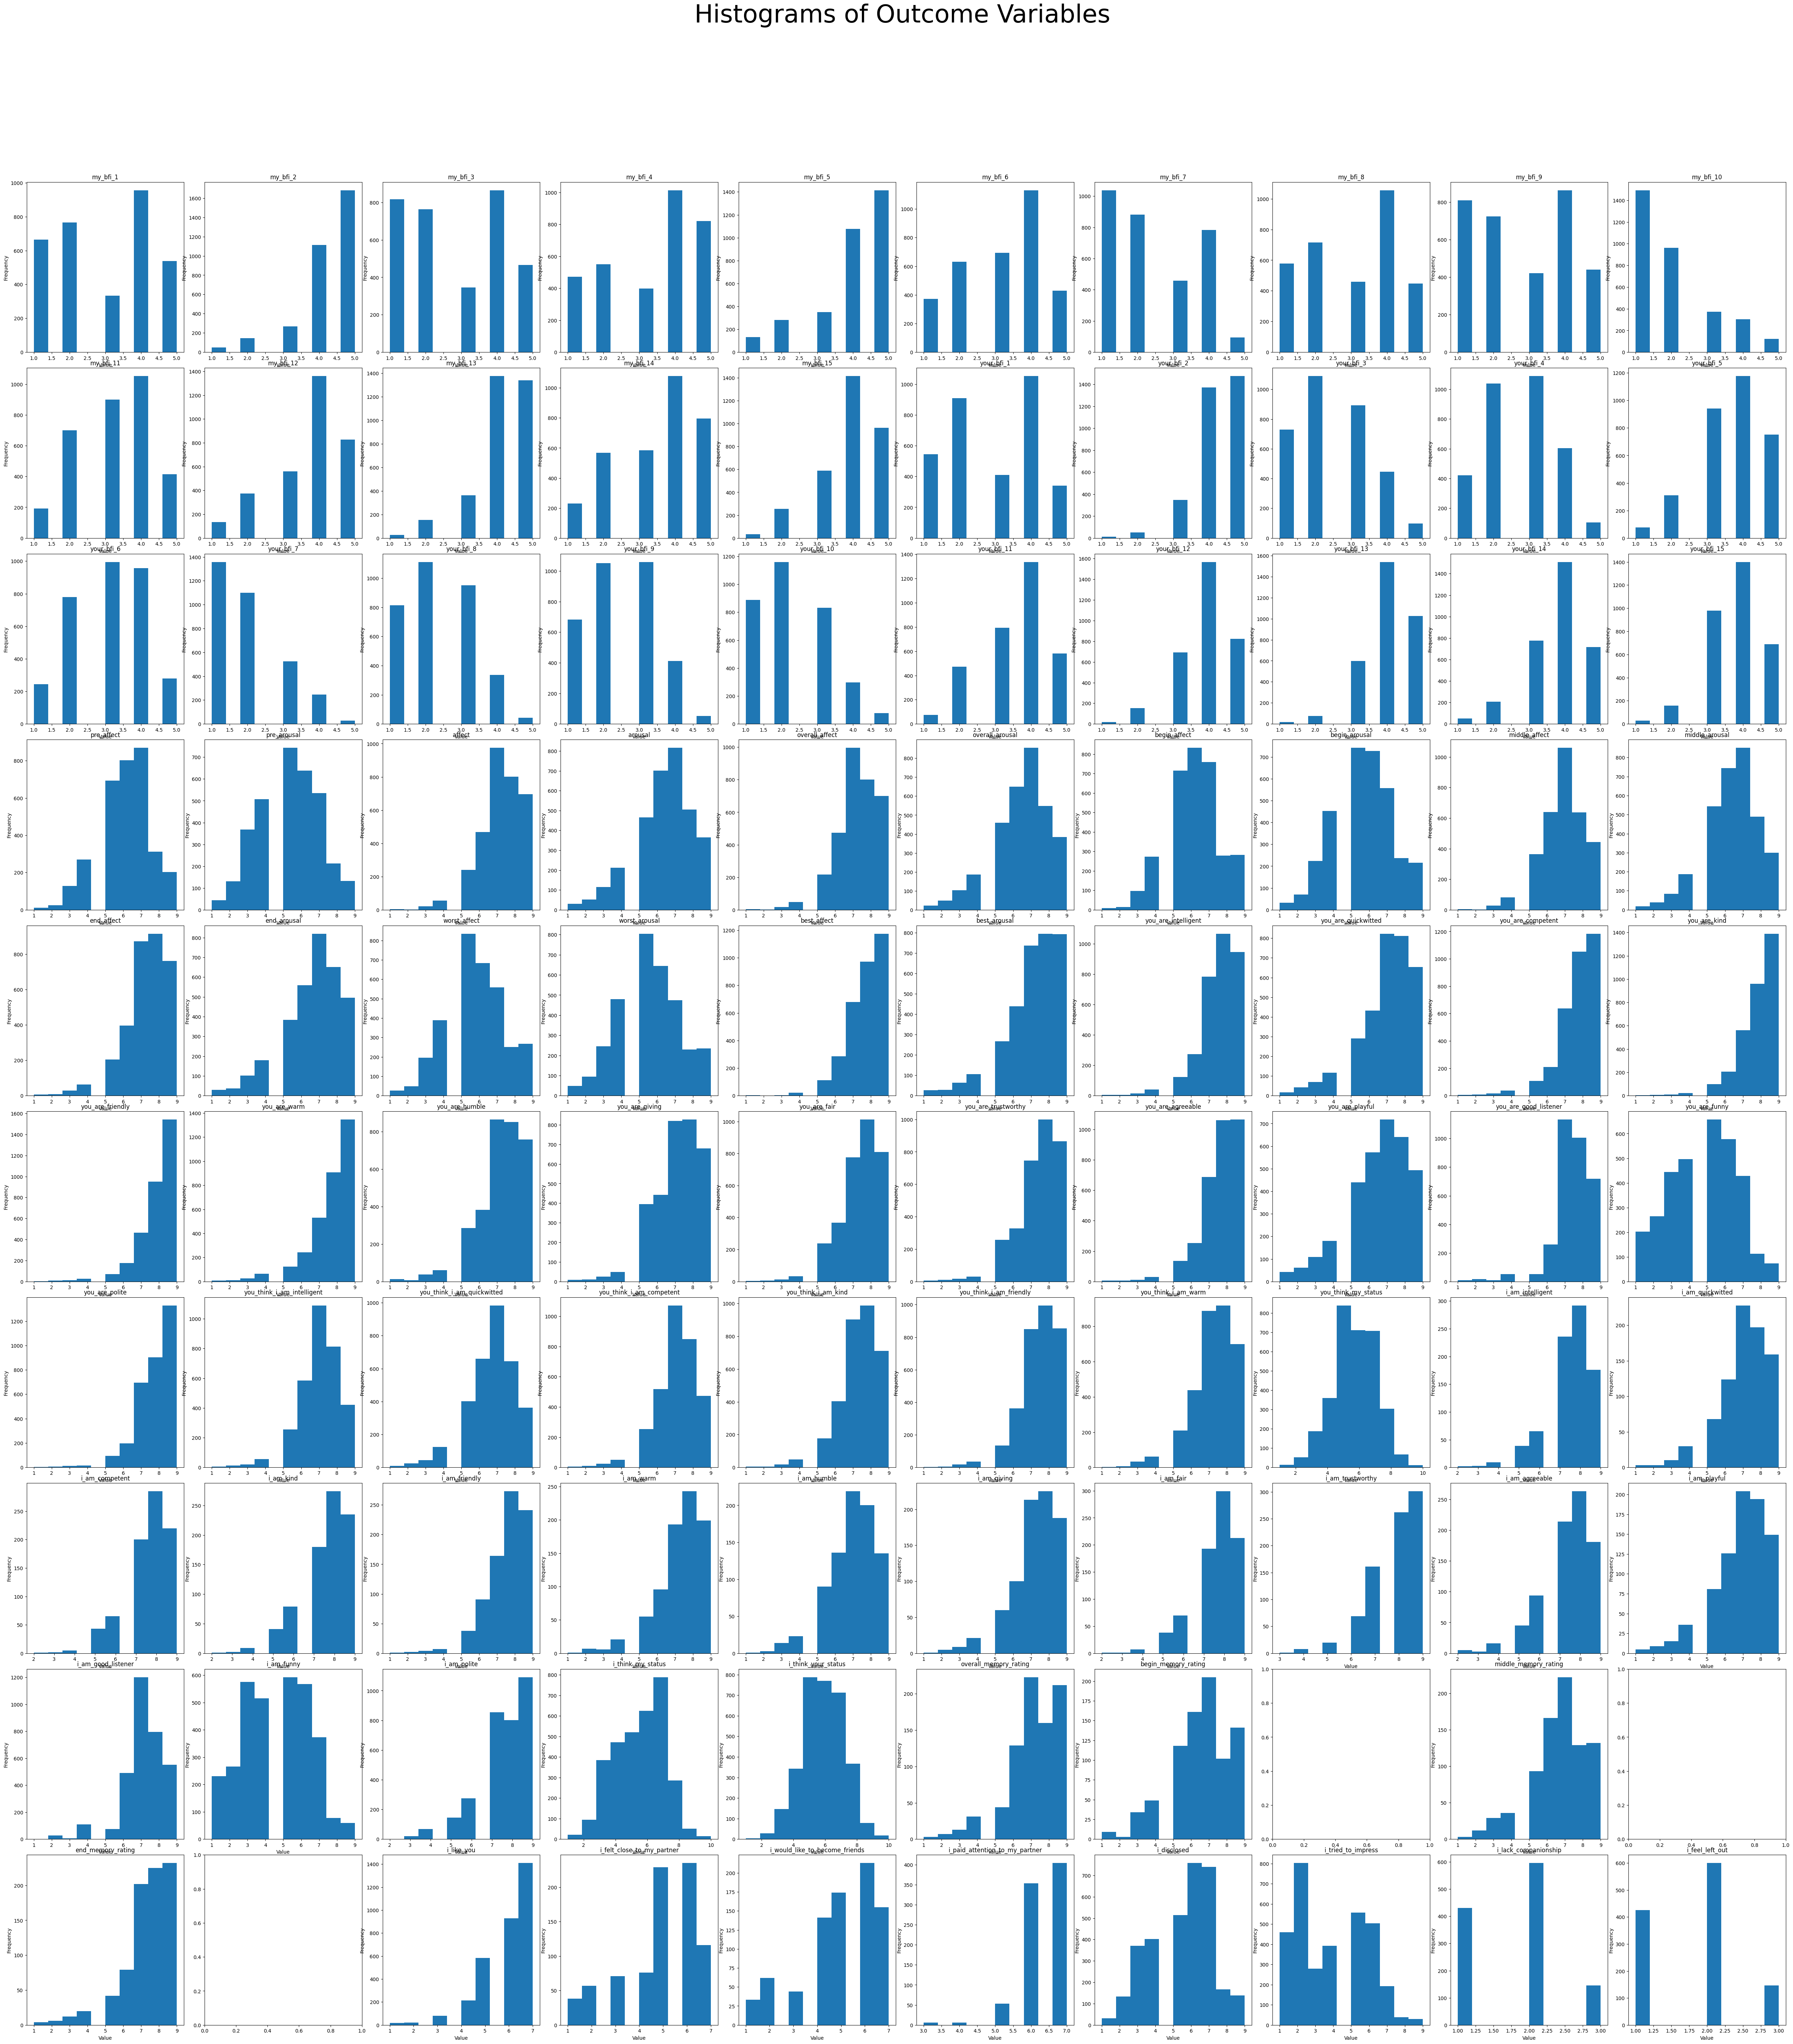

In [43]:
import matplotlib.pyplot as plt
%matplotlib inline
width, height = 10, 10
fig, ax = plt.subplots(height, width, figsize=(50, 60))
fig.tight_layout(rect=[0, 0.03, 1, 0.9])
fig.suptitle("Histograms of Outcome Variables", fontsize=50)
indices = [[x for x in range(width)] for i in range(height)]
imdices_y = [[y for y in range(height)] for i in range(width)]

a=0


# loop through all outcomes
for i in range(height):
  for j in range(width):
    col=outcomes[(width*i)+j]
    try:
      ax[i][j].hist(df[col], bins=10)
      ax[i][j].set_title(col)
      ax[i][j].set_xlabel("Value")
      ax[i][j].set_ylabel("Frequency")
    except:
      print(col)
plt.show()

## Correlation

In [44]:
df.corr().abs().unstack()

survey_duration_in_seconds  survey_duration_in_seconds    1.000000
                            time_zone                     0.004787
                            pre_affect                    0.002322
                            pre_arousal                   0.004531
                            technical_quality             0.024250
                                                            ...   
backchannel_count           your_neurotic                 0.045480
                            your_open                     0.106328
                            backchannel_given             0.608533
                            backchannel_recieved          0.682062
                            backchannel_count             1.000000
Length: 43264, dtype: float64

In [45]:
df_corr = df.corr()
df_corr

,survey_duration_in_seconds,time_zone,pre_affect,pre_arousal,technical_quality,conv_length,affect,arousal,overall_affect,overall_arousal,...,my_neurotic,my_open,your_extraversion,your_agreeable,your_conscientious,your_neurotic,your_open,backchannel_given,backchannel_recieved,backchannel_count
survey_duration_in_seconds,1.000000,-0.004787,0.002322,0.004531,0.024250,0.013045,0.044957,0.038284,0.031892,0.014846,...,0.017332,0.042964,0.020508,0.011683,0.009083,-0.005055,0.022570,0.055045,0.049624,0.080743
time_zone,-0.004787,1.000000,-0.076723,-0.041572,0.031562,-0.016069,-0.040956,-0.018547,-0.034666,-0.027621,...,0.043340,-0.001687,-0.005596,-0.041952,-0.076166,0.074768,-0.004217,-0.036825,0.028009,-0.004802
pre_affect,0.002322,-0.076723,1.000000,0.516117,-0.047226,0.035190,0.413807,0.355937,0.353099,0.310451,...,-0.374710,0.081580,0.054186,0.102637,0.111347,-0.116140,0.076069,0.025371,-0.002940,0.016446
pre_arousal,0.004531,-0.041572,0.516117,1.000000,-0.040569,0.037791,0.309955,0.465021,0.263820,0.413382,...,-0.235210,0.039679,0.079791,0.047053,0.092143,-0.091882,0.074500,0.022468,0.000762,0.017273
technical_quality,0.024250,0.031562,-0.047226,-0.040569,1.000000,0.028162,-0.085644,-0.092416,-0.079950,-0.070530,...,0.085162,0.009590,-0.019616,-0.060525,-0.067760,0.053479,-0.036139,-0.048680,-0.022514,-0.054219
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
your_neurotic,-0.005055,0.074768,-0.116140,-0.091882,0.053479,-0.026696,-0.225984,-0.167243,-0.250712,-0.172142,...,0.249494,-0.031300,-0.273169,-0.326340,-0.534990,1.000000,-0.276081,-0.050399,-0.010021,-0.045480
your_open,0.022570,-0.004217,0.076069,0.074500,-0.036139,0.028986,0.338657,0.197236,0.344653,0.220023,...,-0.038162,0.195991,0.247146,0.404513,0.358286,-0.276081,1.000000,0.058467,0.078120,0.106328
backchannel_given,0.055045,-0.036825,0.025371,0.022468,-0.048680,0.049839,0.116705,0.091473,0.107954,0.069656,...,-0.027631,0.024798,0.057381,0.094320,0.063110,-0.050399,0.058467,1.000000,-0.165245,0.608533
backchannel_recieved,0.049624,0.028009,-0.002940,0.000762,-0.022514,0.049534,0.102438,0.033474,0.070015,0.043962,...,0.001900,0.040268,0.056582,0.049123,0.035344,-0.010021,0.078120,-0.165245,1.000000,0.682062


In [46]:
sorted(df_corr["backchannel_count"].dropna())

[-0.13029943348481532,
 -0.12940733523315884,
 -0.12233728147843399,
 -0.1204719601996549,
 -0.09967122921867956,
 -0.09091497767802906,
 -0.08823444164480965,
 -0.08148792968718174,
 -0.08138983237439949,
 -0.0765604731634451,
 -0.06946066375255311,
 -0.06881323567720439,
 -0.06763500673342376,
 -0.06700281412656062,
 -0.0643853118500341,
 -0.06336461559124221,
 -0.05718726305535853,
 -0.05626596689865786,
 -0.0542189623936822,
 -0.052287500117505395,
 -0.05200624429188245,
 -0.05034659088273109,
 -0.04824224160618696,
 -0.04553989040611572,
 -0.04548013848476272,
 -0.04525720293800617,
 -0.04498125678789784,
 -0.04237721339142925,
 -0.03857202302335405,
 -0.03584383346413062,
 -0.03531556268030812,
 -0.03473252979983159,
 -0.03386246218963861,
 -0.029075783003717194,
 -0.02738785077423519,
 -0.02655553600739777,
 -0.02235288200165585,
 -0.02162974279408906,
 -0.020886496550466663,
 -0.02063654650232041,
 -0.018977947434130445,
 -0.018255355311274743,
 -0.017685518062189907,
 -0.01610

<AxesSubplot:>

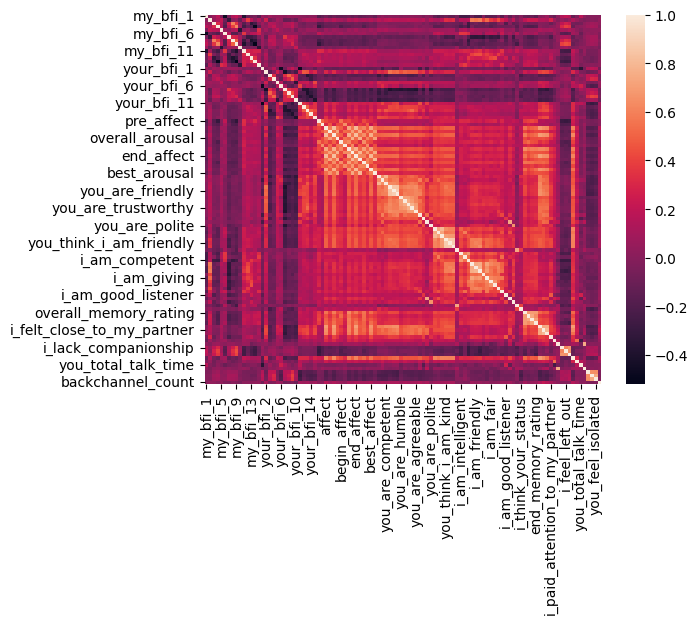

In [47]:
sns.heatmap(df[outcomes+["backchannel_count"]].corr())

# EDA - Backchannel

In [166]:
def get_var_description(var):
    return datadict[datadict['column']==var].iloc[0]['text']

In [167]:
def get_lin_reg(var_y, df, var_x='backchannel_count', logistic=False):
    reg = smf.ols(f'{var_y} ~ {var_x}', data = df).fit()
    plt.figure()
    sns.regplot(y=var_y, x=var_x, data=df, logistic=logistic)
    try:
        description = get_var_description(var_y)
    except:
        description = ""
    plt.title(f"Change in {var_y} with change in {var_x} \n '{description}'")
    return()
    # save_file = f"{savedir}/{var_x}_{var_y}_linreg.png"
    # plt.savefig(save_file)
    # print(f"Saved {save_file}")
    # if showfig:
    #     plt.show()

In [172]:
def save_lin_reg(var_y, df,savedir = "figures", var_x='backchannel_count',):
    reg = smf.ols(f'{var_y} ~ {var_x}', data = df).fit()
    plt.figure()
    sns.regplot(y=var_y, x=var_x, data=df)
    try:
        description = get_var_description(var_y)
    except:
        description = ""
    plt.title(f"Change in {var_y} with change in {var_x} \n '{description}'")
    save_file = rf"{savedir}\{var_x}_{var_y}_linreg.png"
    # plt.savefig(save_file)
    print(f"Saved {save_file}")
    return reg

Saved figures\backchannel_recieved_i_felt_close_to_my_partner_linreg.png


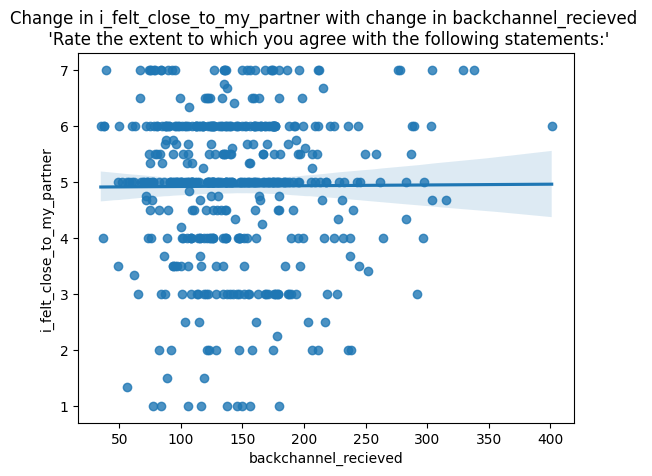

In [215]:
save_lin_reg('i_felt_close_to_my_partner', df_users, var_x="backchannel_recieved")

Saved figures\backchannel_recieved_responsive_linreg.png


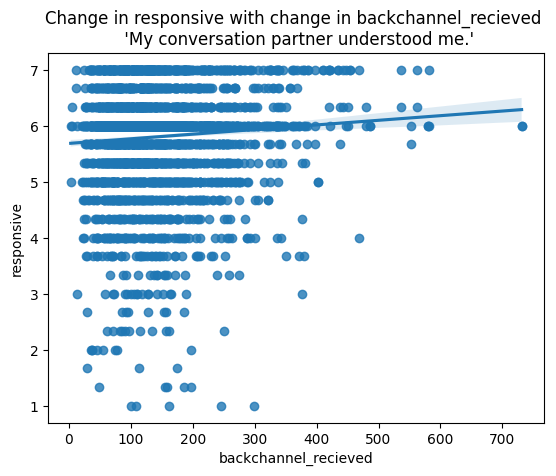

In [173]:
save_lin_reg("responsive", df_selected, var_x="backchannel_recieved")

Saved figures\backchannel_recieved_mood_change_linreg.png


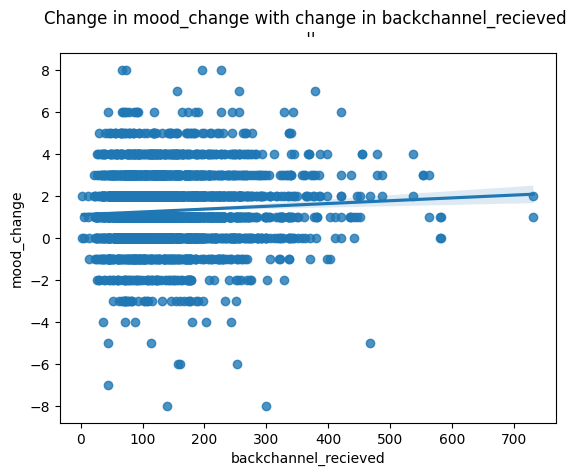

In [175]:
save_lin_reg("mood_change", df_selected, var_x="backchannel_recieved")

Saved figures\backchannel_recieved_worst_affect_linreg.png


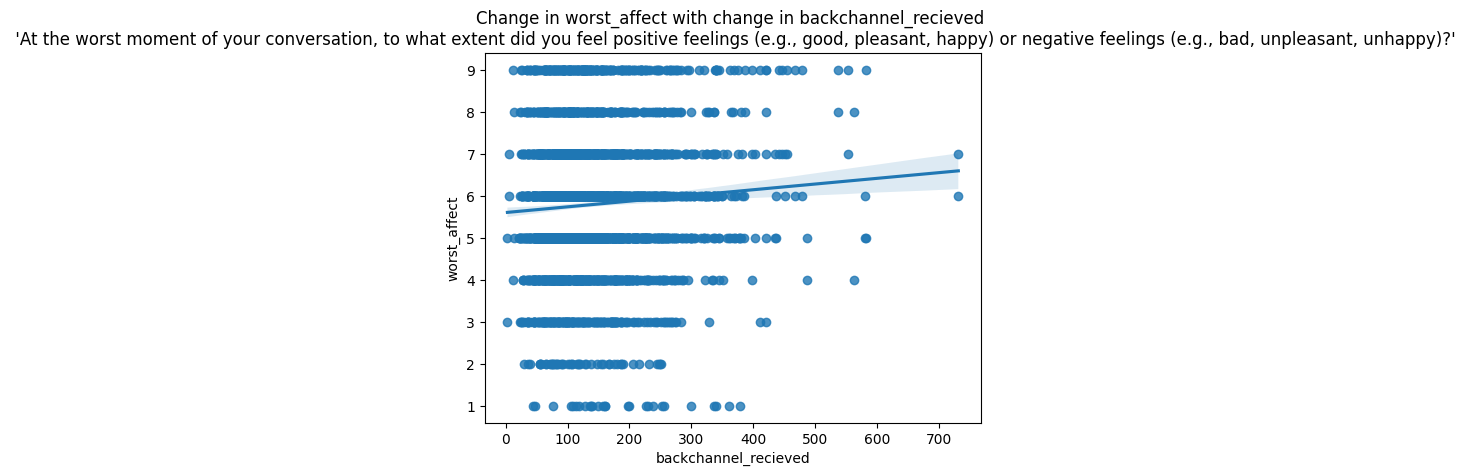

In [211]:
reg = save_lin_reg("worst_affect", df_selected, var_x="backchannel_recieved")


Saved figures\backchannel_recieved_mood_change_binary_linreg.png


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     mood_change_binary   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     12.20
Date:                Wed, 14 Jun 2023   Prob (F-statistic):           0.000485
Time:                        18:52:01   Log-Likelihood:                -2097.9
No. Observations:                3257   AIC:                             4200.
Df Residuals:                    3255   BIC:                             4212.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                0.6425      0.016     39.366      0.000       0.611       0.675
backchannel_recieved     0.0003   9.96e-05      3.493      0.000       0.000       0.001
==============================================================================
Omnibus:                    10377.682   Durbin-Watson:                   1.954
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              600.333
Skew:                          -0.827   Prob(JB):                    4.36e-131
Kurtosis:                       1.700   Cond. No.                         331.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

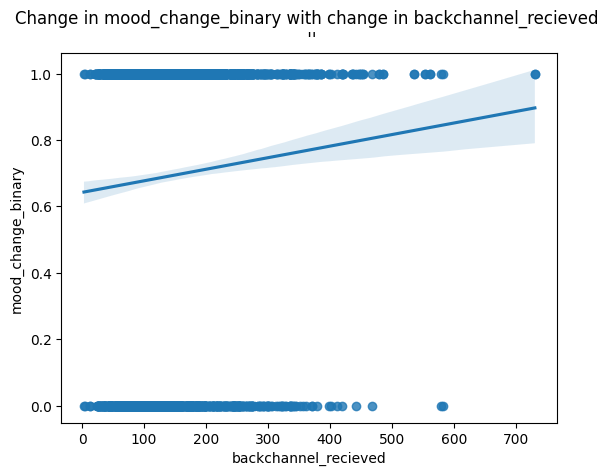

In [210]:
reg = save_lin_reg("mood_change_binary", df_selected, var_x="backchannel_recieved")
reg.summary()

In [51]:
for outcome in outcomes:
    reg = save_lin_reg(outcome, df)
    print(outcome, get_var_description(outcome))
    reg.summary()

NameError: name 'logistic' is not defined

<Figure size 640x480 with 0 Axes>

In [ ]:
import ipywidgets as widgets
graph = widgets.interactive(get_lin_reg,df=widgets.fixed(df), var_y = outcomes, var_x = ["backchannel_count", "backchannel_given"])
display(graph)

interactive(children=(Dropdown(description='var_y', options=('my_bfi_1', 'my_bfi_2', 'my_bfi_3', 'my_bfi_4', '…

Text(0, 0.5, 'Frequency')

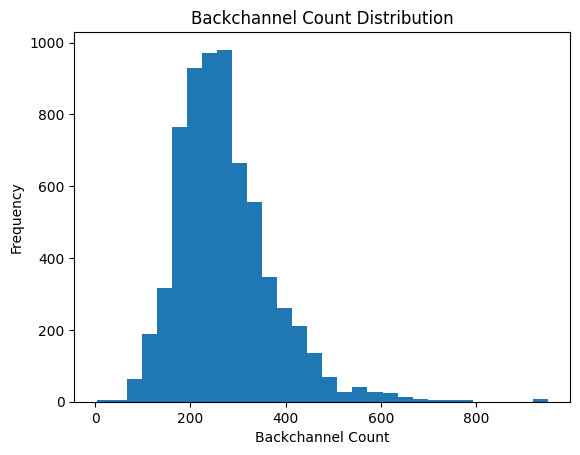

In [ ]:
plt.hist(df["backchannel_count"], bins=30)
plt.title("Backchannel Count Distribution")
plt.xlabel("Backchannel Count")
plt.ylabel("Frequency")

In [ ]:
df_truncated = df[df["backchannel_count"]<600]


In [ ]:
a = save_lin_reg(df=df_truncated, var_y = "responsive_1")
a.summary()


Saved figures\backchannel_count_responsive_1_linreg.png


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           responsive_1   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                  0.012
Method:                 Least Squares   F-statistic:                     76.65
Date:                Wed, 31 May 2023   Prob (F-statistic):           2.57e-18
Time:                        19:08:51   Log-Likelihood:                -9446.3
No. Observations:                6448   AIC:                         1.890e+04
Df Residuals:                    6446   BIC:                         1.891e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             5.3718      0.041    132.098      0.000       5.292       5.452
backchannel_count     0.0013      0.000      8.755      0.000       0.001       0.002
==============================================================================
Omnibus:                     1723.487   Durbin-Watson:                   0.954
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4752.850
Skew:                          -1.415   Prob(JB):                         0.00
Kurtosis:                       6.111   Cond. No.                         885.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Responsive Variables

In [ ]:
responsive_outcomes = list(filter(re.compile("^.*responsive.*$").match, df.columns))
responsive_outcomes

In [ ]:
df["responsive_sum"] = df["responsive"] + df["responsive_1"]+df["responsive_2"]+df["responsive_3"]
df["responsive_mean"] = df["responsive_sum"] / len(responsive_outcomes)

In [ ]:
reg = get_lin_reg(df, var_y = "responsive_mean", description="Mean of responsive variables")


In [ ]:
for var in responsive_outcomes:
    reg = get_lin_reg(df, var_y=var, description=get_var_description(var))
    print(reg.mse_resid)
    print("\n")

In [ ]:
cols = ['i_felt_close_to_my_partner' 'i_would_like_to_become_friends'
 'i_paid_attention_to_my_partner' 'my_partner_paid_attention_to_me'
 'my_partner_was_clear_and_coherent']
df["rate_conv"] = df['i_felt_close_to_my_partner'] + df['i_would_like_to_become_friends'] + df['i_paid_attention_to_my_partner'] + df['my_partner_paid_attention_to_me'] + df['my_partner_was_clear_and_coherent']


In [ ]:
affect_arousal_outcomes =  ['pre_affect', 'pre_arousal', 'affect', 'arousal', 'overall_affect', 'overall_arousal', 'begin_affect', 'begin_arousal', 'middle_affect', 'middle_arousal', 'end_affect', 'end_arousal', 'worst_affect', 'worst_arousal', 'best_affect', 'best_arousal']
df["affect_arousal"] = df["pre_affect"] + df["pre_arousal"] + df["affect"] + df["arousal"] + df["overall_affect"] + df["overall_arousal"] + df["begin_affect"] + df["begin_arousal"] + df["middle_affect"] + df["middle_arousal"] + df["end_affect"] + df["end_arousal"] + df["worst_affect"] + df["worst_arousal"] + df["best_affect"] + df["best_arousal"]
sns.regplot(y='affect_arousal', x='backchannel_count', data=df)
plt.show()

In [ ]:
df["responsive_1_binary"] = np.where(df["responsive_1"] > 4, 1, 0)

()

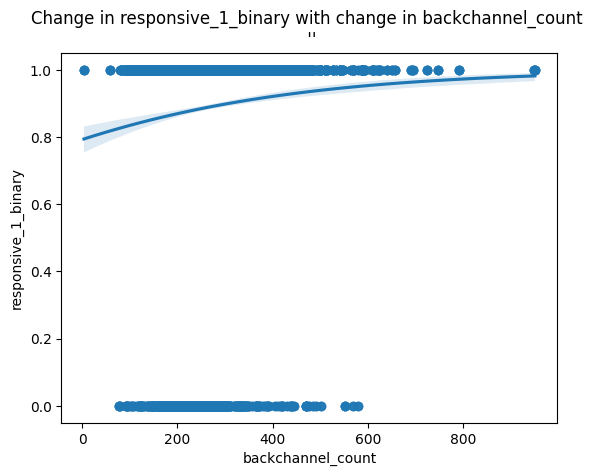

In [ ]:
get_lin_reg("responsive_1_binary", df, logistic=True)

In [204]:
df_selected["backchannel_count"]

0                 352.0
2                 352.0
4                 172.0
6                 172.0
8                 249.0
                  ...  
6616              445.0
6618              445.0
6620              241.0
6622              241.0
arousal_change      NaN
Name: backchannel_count, Length: 3258, dtype: float64

# Other EDA

In [ ]:
df["pre_affect"]
df["begin_affect"]
df["middle_affect"]
df["end_affect"]

fig = plt.figure(figsize=(20, 10))
plt.hist(df["pre_affect"], label = "pre_affect", bins = 20)
plt.hist(df["begin_affect"], label = "begin_affect", bins = 20)
plt.hist(df["middle_affect"], label = "middle_affect", bins = 20)
plt.hist(df["end_affect"], label = "end_affect", bins = 20)
plt.legend()
plt.show()
#boxplot

In [54]:
df["end_affect"].isnull().sum()

55

In [56]:
df_selected = df[df["end_affect"].notnull()]

In [58]:
df_selected["end_affect"].isnull().sum()

0

In [59]:
df_selected["mood_change"] = df_selected["end_affect"] - df_selected["pre_affect"]

/var/folders/00/m60tc6k15sdc_j3vzl01_flc0000gn/T/ipykernel_45714/2418058093.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected["mood_change"] = df_selected["end_affect"] - df_selected["pre_affect"]


In [60]:
df_selected["mood_change"].describe()

count    3257.000000
mean        1.287688
std         1.661960
min        -8.000000
25%         0.000000
50%         1.000000
75%         2.000000
max         8.000000
Name: mood_change, dtype: float64

/var/folders/00/m60tc6k15sdc_j3vzl01_flc0000gn/T/ipykernel_45714/3093184492.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected["mood_change_binary"] = np.where(df_selected["mood_change"] > 0,1, 0)


Text(0, 0.5, 'Response Count')

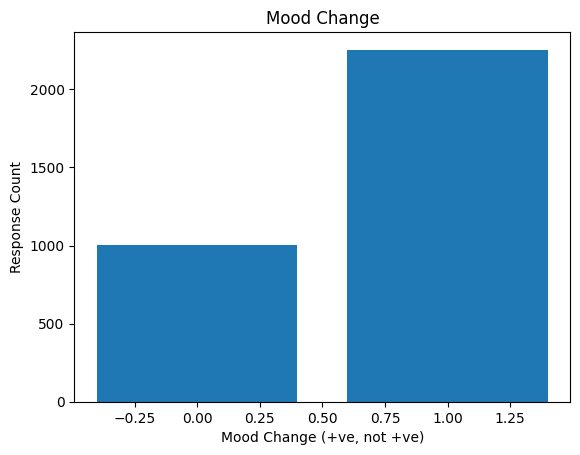

In [128]:
df_selected["mood_change_binary"] = np.where(df_selected["mood_change"] > 0,1, 0)
plt.bar(df_selected["mood_change_binary"].value_counts().index, df_selected["mood_change_binary"].value_counts())
plt.title("Mood Change")
plt.xlabel("Mood Change (+ve, not +ve)")
plt.ylabel("Response Count")

/var/folders/00/m60tc6k15sdc_j3vzl01_flc0000gn/T/ipykernel_45714/4121343815.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected["mood_change_direction"] = np.where(df_selected["mood_change"] > 0, 1, np.where(df_selected["mood_change"]==0, 0, -1 ))


Text(0, 0.5, 'Response Count')

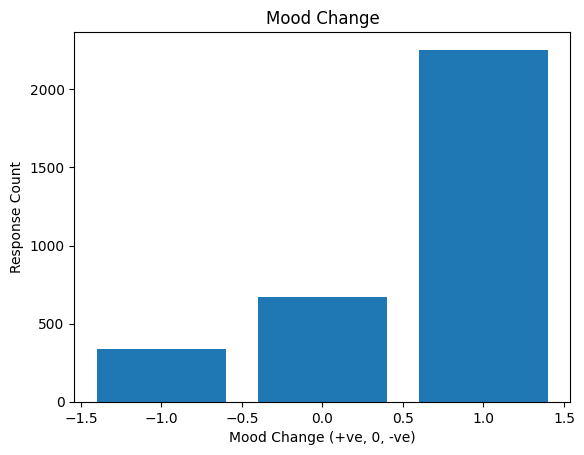

In [129]:
df_selected["mood_change_direction"] = np.where(df_selected["mood_change"] > 0, 1, np.where(df_selected["mood_change"]==0, 0, -1 ))
plt.bar(df_selected["mood_change_direction"].value_counts().index, df_selected["mood_change_direction"].value_counts())
plt.title("Mood Change")
plt.xlabel("Mood Change (+ve, 0, -ve)")
plt.ylabel("Response Count")

Text(0, 0.5, 'Response Count')

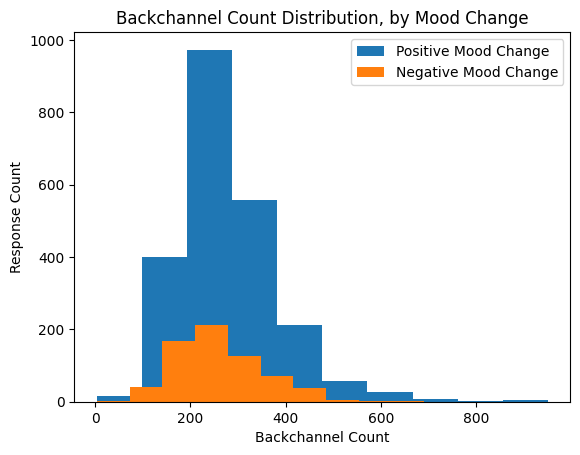

In [123]:
plt.hist(df_selected[df_selected["mood_change_binary"]==1]["backchannel_count"], label="Positive Mood Change")
plt.hist(df_selected[df_selected["mood_change_binary"]==0]["backchannel_count"], label="Negative Mood Change")
plt.legend()
plt.title("Backchannel Count Distribution, by Mood Change")
plt.xlabel("Backchannel Count")
plt.ylabel("Response Count")

Text(0, 0.5, 'Response Count')

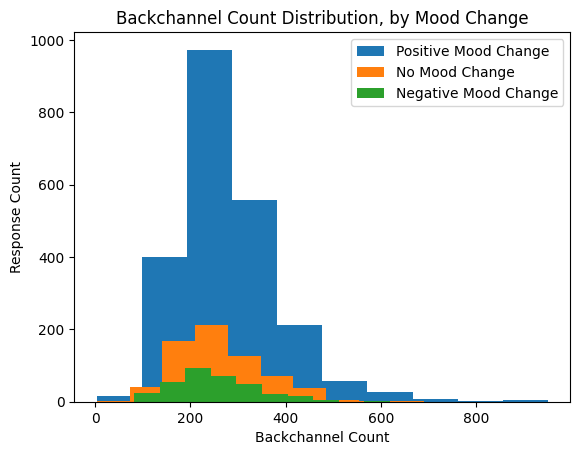

In [134]:
plt.hist(df_selected[df_selected["mood_change_direction"]==1]["backchannel_count"], label="Positive Mood Change")
plt.hist(df_selected[df_selected["mood_change_direction"]==0]["backchannel_count"], label="No Mood Change")
plt.hist(df_selected[df_selected["mood_change_direction"]==-1]["backchannel_count"], label="Negative Mood Change")
plt.legend()
plt.title("Backchannel Count Distribution, by Mood Change")
plt.xlabel("Backchannel Count")
plt.ylabel("Response Count")

Is there a difference between the mean backchannel count between people with positive/negative mood changes?

In [126]:
df_selected.groupby("mood_change_binary").mean()["backchannel_given"]

mood_change_binary
-1    120.358209
 0    125.664671
 1    133.795475
Name: backchannel_given, dtype: float64

In [130]:
df_selected.groupby("mood_change_binary").mean()["backchannel_count"]

mood_change_binary
0    258.857428
1    279.492458
Name: backchannel_count, dtype: float64

In [132]:
# The difference in mean backchannel count is 10. 
df_selected.groupby("mood_change_binary").mean()["backchannel_recieved"]

mood_change_binary
0    134.965105
1    145.696983
Name: backchannel_recieved, dtype: float64

Is there a difference in average mood change between people with high/low backchannel counts?

In [137]:
backchannel_mean = df["backchannel_count"].median()
backchannel_mean
df["backchannel_given"].median()
print(df["backchannel_recieved"].median())

125.0


(array([ 480., 1292.,  908.,  346.,  182.,   50.,   36.,   10.,    2.,
           6.]),
 array([  1. ,  61.1, 121.2, 181.3, 241.4, 301.5, 361.6, 421.7, 481.8,
        541.9, 602. ]),
 <BarContainer object of 10 artists>)

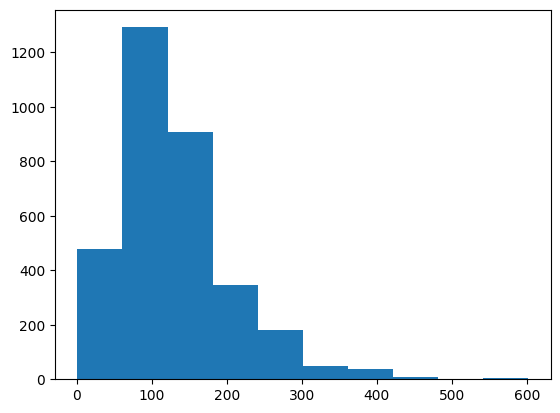

In [139]:
plt.hist(df["backchannel_given"])


125.0


/var/folders/00/m60tc6k15sdc_j3vzl01_flc0000gn/T/ipykernel_45714/52445150.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected["backchannel_recieved_binary"] = np.where(df_selected["backchannel_recieved"]>df_selected["backchannel_recieved"].median(), 1, 0)


Text(0, 0.5, 'Response Count')

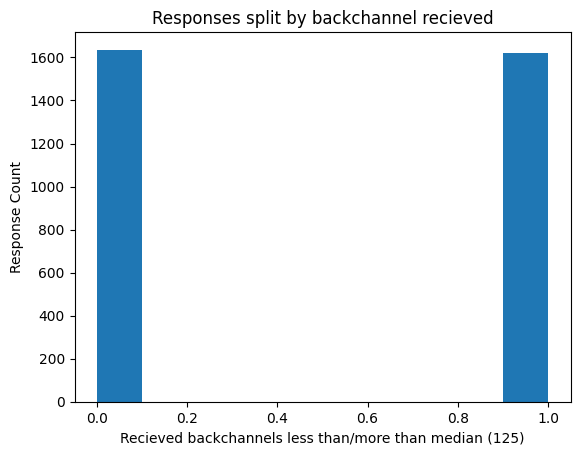

In [152]:
print(df_selected["backchannel_recieved"].median())
df_selected["backchannel_recieved_binary"] = np.where(df_selected["backchannel_recieved"]>df_selected["backchannel_recieved"].median(), 1, 0)
plt.hist(df_selected["backchannel_recieved_binary"])
plt.xlabel("Recieved backchannels less than/more than median (125)")
plt.title("Responses split by backchannel recieved")
plt.ylabel("Response Count")

Text(0, 0.5, 'Response Count')

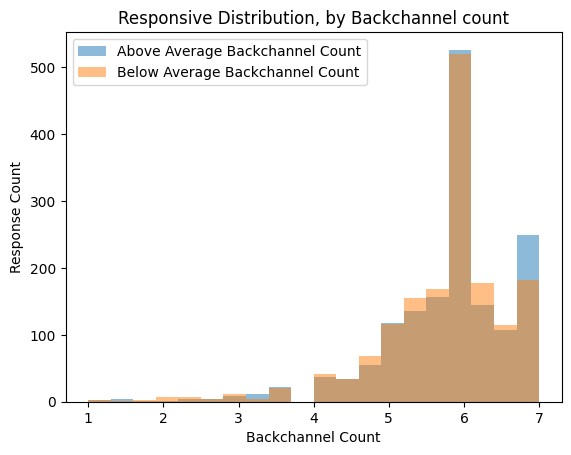

In [161]:
plt.hist(df_selected[df_selected["backchannel_recieved_binary"]==1]["responsive"], alpha=0.5, label="Above Average Backchannel Count", bins=20)
plt.hist(df_selected[df_selected["backchannel_recieved_binary"]==0]["responsive"], alpha=0.5, label="Below Average Backchannel Count", bins=20)
plt.legend()
plt.title("Responsive Distribution, by Backchannel count")
plt.xlabel("Backchannel Count")
plt.ylabel("Response Count")

Text(0, 0.5, 'Response Count')

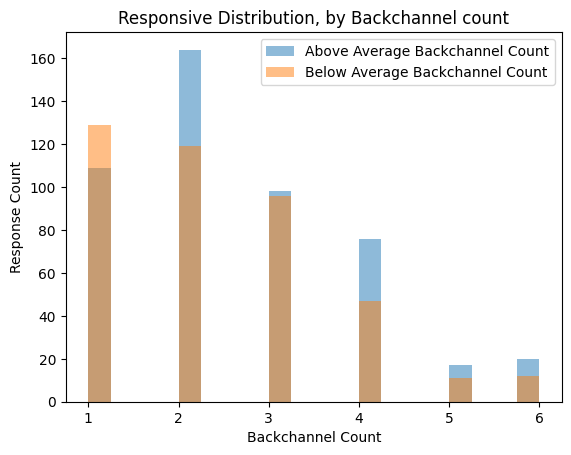

In [163]:
plt.hist(df_selected[df_selected["backchannel_recieved_binary"]==1]['how_long_other'], alpha=0.5, label="Above Average Backchannel Count", bins=20)
plt.hist(df_selected[df_selected["backchannel_recieved_binary"]==0]['how_long_other'], alpha=0.5, label="Below Average Backchannel Count", bins=20)
plt.legend()
plt.title("How Long Other Distribution, by Backchannel count")
plt.xlabel("Backchannel Count")
plt.ylabel("Response Count")

Text(0, 0.5, 'Response Count')

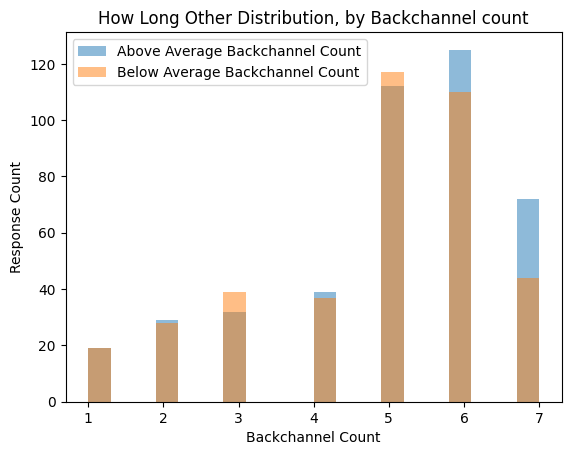

In [177]:
plt.hist(df_selected[df_selected["backchannel_recieved_binary"]==1]['i_felt_close_to_my_partner'], alpha=0.5, label="Above Average Backchannel Count", bins=20)
plt.hist(df_selected[df_selected["backchannel_recieved_binary"]==0]['i_felt_close_to_my_partner'], alpha=0.5, label="Below Average Backchannel Count", bins=20)
plt.legend()
plt.title("How Long Other Distribution, by Backchannel count")
plt.xlabel("Backchannel Count")
plt.ylabel("Response Count")

Text(0, 0.5, 'Response Count')

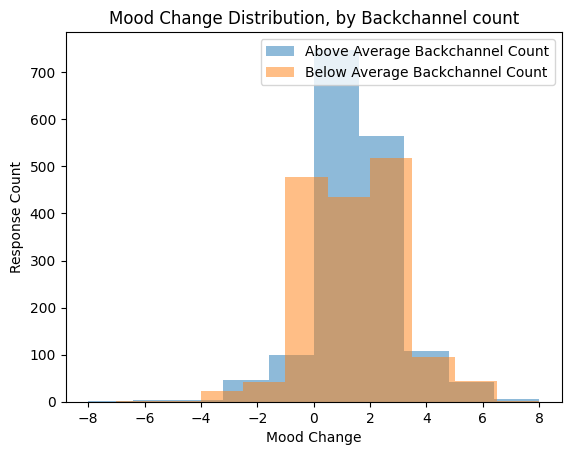

In [207]:
plt.hist(df_selected[df_selected["backchannel_recieved_binary"]==1]['mood_change'], alpha=0.5, label="Above Average Backchannel Count", bins=10)
plt.hist(df_selected[df_selected["backchannel_recieved_binary"]==0]['mood_change'], alpha=0.5, label="Below Average Backchannel Count", bins=10)
plt.legend()
plt.title("Mood Change Distribution, by Backchannel count")
plt.xlabel("Mood Change")
plt.ylabel("Response Count")

Text(0, 0.5, 'Response Count')

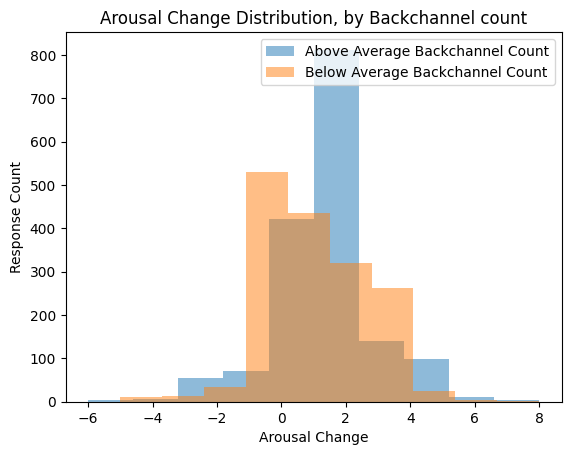

In [209]:
plt.hist(df_selected[df_selected["backchannel_recieved_binary"]==1]['arousal_change'], alpha=0.5, label="Above Average Backchannel Count", bins=10)
plt.hist(df_selected[df_selected["backchannel_recieved_binary"]==0]['arousal_change'], alpha=0.5, label="Below Average Backchannel Count", bins=10)
plt.legend()
plt.title("Arousal Change Distribution, by Backchannel count")
plt.xlabel("Arousal Change")
plt.ylabel("Response Count")

(array([   6.,   15.,  102.,  140.,  881., 1568.,  328.,  195.,   16.,
           6.]),
 array([-6. , -4.6, -3.2, -1.8, -0.4,  1. ,  2.4,  3.8,  5.2,  6.6,  8. ]),
 <BarContainer object of 10 artists>)

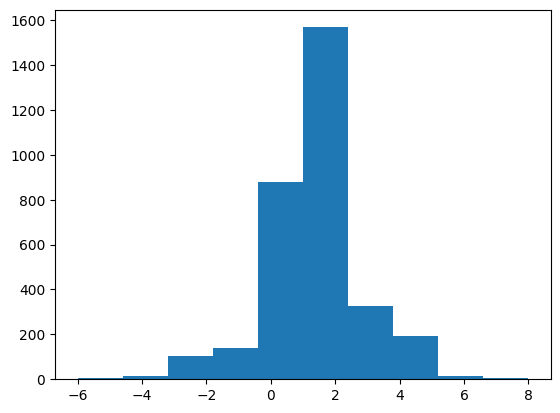

In [181]:
plt.hist(df_selected["arousal_change"])

In [ ]:
df_selected["arousal_change_binary"] = np.where(df["end_arousal"])

In [ ]:
plt.hist(df_selected[df_selected["backchannel_recieved_binary"]==1]['mood_change_binary'], alpha=0.5, label="Above Average Backchannel Count", bins=20)
plt.hist(df_selected[df_selected["backchannel_recieved_binary"]==0]['mood_change_binary'], alpha=0.5, label="Below Average Backchannel Count", bins=20)
plt.legend()
plt.title("How Long Other Distribution, by Backchannel count")
plt.xlabel("Backchannel Count")
plt.ylabel("Response Count")

(array([1648.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        1664.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

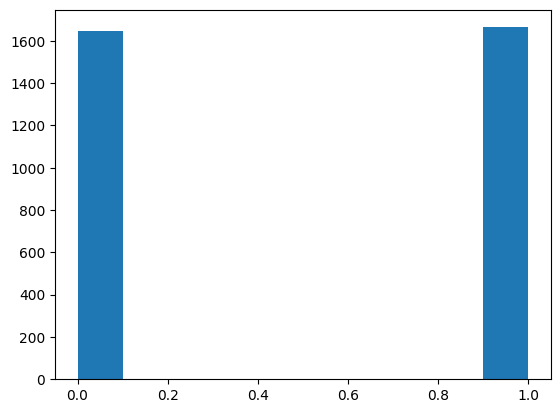

In [92]:
plt.hist(df["backchannel_binary"])

Text(0, 0.5, 'Response Count')

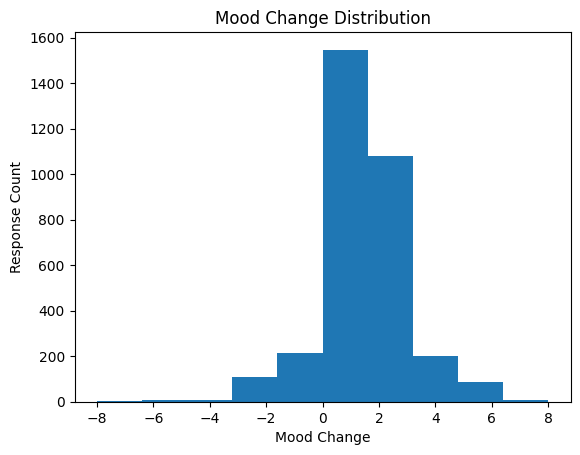

In [110]:
plt.hist(df_selected["mood_change"], bins=10)
plt.title("Mood Change Distribution")
plt.xlabel("Mood Change")
plt.ylabel("Response Count")

/var/folders/00/m60tc6k15sdc_j3vzl01_flc0000gn/T/ipykernel_45714/2423027208.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected["arousal_change"] = df_selected["end_arousal"] - df_selected["worst_arousal"]


(array([   6.,   15.,  102.,  140.,  881., 1568.,  328.,  195.,   16.,
           6.]),
 array([-6. , -4.6, -3.2, -1.8, -0.4,  1. ,  2.4,  3.8,  5.2,  6.6,  8. ]),
 <BarContainer object of 10 artists>)

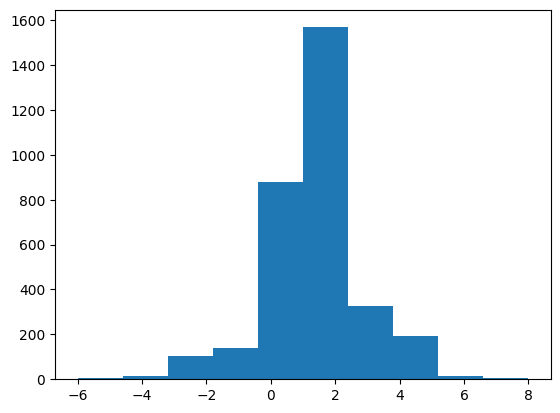

In [104]:
df_selected["arousal_change"] = df_selected["end_arousal"] - df_selected["worst_arousal"]
plt.hist(df_selected["arousal_change"])

In [ ]:
p

(array([   6.,   15.,  102.,  140.,  881., 1568.,  328.,  195.,   16.,
           6.]),
 array([-6. , -4.6, -3.2, -1.8, -0.4,  1. ,  2.4,  3.8,  5.2,  6.6,  8. ]),
 <BarContainer object of 10 artists>)

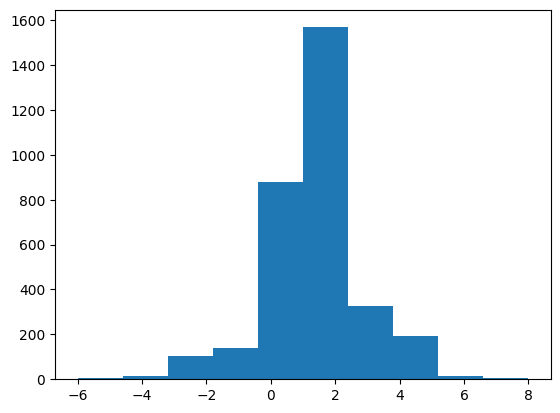

In [165]:
"backchannel_count"

'backchannel_count'

In [187]:
df_selected

,user_id,partner_id,conversation,date,survey_duration_in_seconds,time_zone,pre_affect,pre_arousal,technical_quality,conv_length,...,most_common_format_past24,speaker,backchannel_given,backchannel_recieved,backchannel_count,mood_change,mood_change_binary,arousal_change,mood_change_direction,backchannel_recieved_binary
0,5a73899f9cdd1800017786f0,5fa072f4f4aa580b63834357,0020a0c5-1658-4747-99c1-2839e736b481,2020-11-10,4115.0,6.0,5.0,4.0,1.0,45.0,...,NaN,5a73899f9cdd1800017786f0,269.0,83.0,352.0,3.0,1,2.0,1,0
2,5fa072f4f4aa580b63834357,5a73899f9cdd1800017786f0,0020a0c5-1658-4747-99c1-2839e736b481,2020-11-10,3949.0,6.0,7.0,6.0,1.0,43.0,...,NaN,5a73899f9cdd1800017786f0,269.0,83.0,352.0,2.0,1,2.0,1,0
4,5f482b0da1cde52de45f174c,5f57120cba207c18f058a62b,002d68da-7738-4177-89d9-d72ae803e0e4,2020-11-15,3293.0,8.0,7.0,6.0,1.0,34.0,...,NaN,5f482b0da1cde52de45f174c,76.0,96.0,172.0,1.0,1,3.0,1,0
6,5f57120cba207c18f058a62b,5f482b0da1cde52de45f174c,002d68da-7738-4177-89d9-d72ae803e0e4,2020-11-15,4393.0,5.0,7.0,5.0,1.0,34.0,...,NaN,5f482b0da1cde52de45f174c,76.0,96.0,172.0,1.0,1,3.0,1,0
8,5d510396f6725b001a4fc025,5dd5bc3bd5cef8000b9861d5,00411458-8275-4b92-a000-d52187f03604,2020-01-09,3215.0,6.0,6.0,4.0,2.0,35.0,...,NaN,5d510396f6725b001a4fc025,188.0,61.0,249.0,2.0,1,2.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6616,5dd406d9c23e0d3e6dacc034,5e820a4e26ed71918013d860,ffe5cccf-82b3-4938-a2e9-38335d188e44,2020-08-11,3614.0,5.0,7.0,7.0,1.0,39.0,...,NaN,5dd406d9c23e0d3e6dacc034,186.0,259.0,445.0,2.0,1,0.0,1,1
6618,5e820a4e26ed71918013d860,5dd406d9c23e0d3e6dacc034,ffe5cccf-82b3-4938-a2e9-38335d188e44,2020-08-11,4182.0,5.0,8.0,8.0,1.0,30.0,...,NaN,5dd406d9c23e0d3e6dacc034,186.0,259.0,445.0,1.0,1,2.0,1,1
6620,5977e3867412f8000194e1fe,5d5162f1b50a1000169da137,fffda3e6-7d99-4db8-aa12-16e99fa454c2,2020-08-11,2785.0,6.0,6.0,6.0,1.0,26.0,...,NaN,5977e3867412f8000194e1fe,25.0,216.0,241.0,-2.0,0,1.0,-1,1
6622,5d5162f1b50a1000169da137,5977e3867412f8000194e1fe,fffda3e6-7d99-4db8-aa12-16e99fa454c2,2020-08-11,3434.0,6.0,7.0,7.0,1.0,26.0,...,NaN,5977e3867412f8000194e1fe,25.0,216.0,241.0,0.0,0,2.0,0,1


In [189]:
len(df_selected["user_id"].unique())

1433

In [190]:
len(df_selected["user_id"])

3258

In [191]:
3258/2

1629.0

In [192]:
1629-1433

196

In [197]:
df_users = df_selected.groupby(["user_id"]).mean()

(array([ 47., 346., 506., 311., 133.,  51.,  24.,   5.,   3.,   6.]),
 array([  3. ,  51.3,  99.6, 147.9, 196.2, 244.5, 292.8, 341.1, 389.4,
        437.7, 486. ]),
 <BarContainer object of 10 artists>)

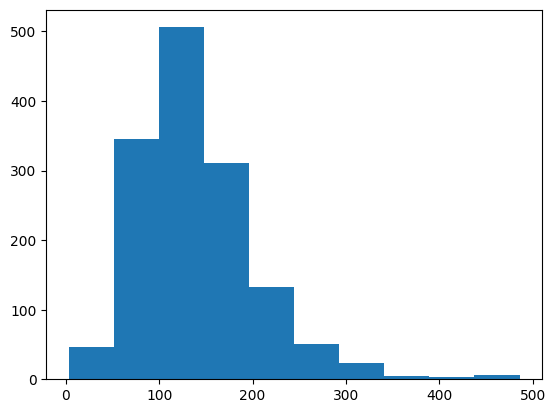

In [206]:
plt.hist(df_users["backchannel_recieved"])

In [203]:
df_users["your_mind_wander"]

user_id
53979923fdf99b1ccc3f11f6    1.000000
555527dafdf99b16a75afd54    1.000000
558823c2fdf99b318cb4224b    5.000000
558a0bc6fdf99b2d7699a94c    2.000000
558a327cfdf99b2d75651681    3.666667
                              ...   
5fa1da0b8810903802fc6390    3.000000
5fa41b6733b31601ac3f79c5    4.000000
5fa46f7a614df30ea736fd1e    3.333333
5fa6006c1355231e6094a472    3.333333
5fa727ceb78937465e777bc7    1.000000
Name: your_mind_wander, Length: 1432, dtype: float64

In [201]:
corr_df

,column,corr,column_description
0,your_mind_wander,-0.130299,"102 During your conversation, how much do y..."
1,interested_in_exchanging_contact_info,-0.129407,48 If you had the opportunity to exchange c...
2,my_sad_pre_covid,-0.122337,"195 Prior to the Covid-19 outbreak, to what..."
3,my_mind_wander,-0.120472,"101 During your conversation, how much did ..."
4,you_are_good_listener,0.101569,96 My partner was a good listener.\nName: t...
...,...,...,...
56,how_long_other,0.229871,119 How much longer do you think your partn...
57,am_i_sheltering_in_place_now,0.232449,202 Are you currently staying at home most ...
58,backchannel_given,0.644520,"Series([], Name: text, dtype: object)"
59,backchannel_recieved,0.644520,"Series([], Name: text, dtype: object)"


In [202]:
corr_df.sort_values(by="corr", ascending=False).head(20)

,column,corr,column_description
60,backchannel_count,1.000000,"Series([], Name: text, dtype: object)"
59,backchannel_recieved,0.644520,"Series([], Name: text, dtype: object)"
58,backchannel_given,0.644520,"Series([], Name: text, dtype: object)"
57,am_i_sheltering_in_place_now,0.232449,202 Are you currently staying at home most ...
56,how_long_other,0.229871,119 How much longer do you think your partn...
...,...,...,...
4,you_are_good_listener,0.101569,96 My partner was a good listener.\nName: t...
3,my_mind_wander,-0.120472,"101 During your conversation, how much did ..."
2,my_sad_pre_covid,-0.122337,"195 Prior to the Covid-19 outbreak, to what..."
1,interested_in_exchanging_contact_info,-0.129407,48 If you had the opportunity to exchange c...
